In [2]:
from keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import SGD


import matplotlib.pyplot as plt

import numpy as np

C:\Users\zabeeh\PycharmProjects\DeepLearning\v_general\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

print(f"Training data shape: {trainX.shape}")       #(50000, 32, 32, 3)
print(f"Training labels shape: {trainY.shape}")         #(50000, 1)
print(f"Test data shape: {testX.shape}")                #(10000, 32, 32, 3)
print(f"Test labels shape: {testY.shape}")                  #(10000, 1)

trainX, testX = trainX.astype("float32") / 255.0, testX.astype("float32") / 255.0

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


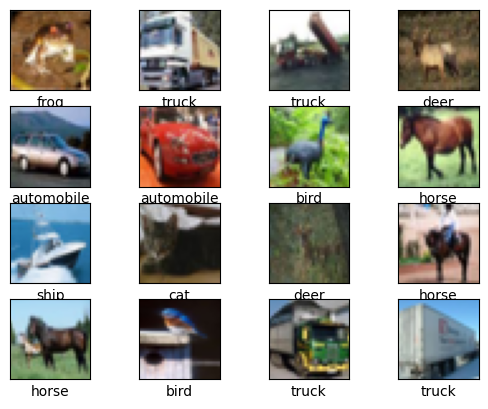

In [4]:

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(labelNames[trainY[i][0]])
plt.show()

In [5]:
""""
if flatten then use

trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

input_shape = (3072,)
# define the 3072 -> Dense (1024) -> Dense(512) -> Dense(10) architecture using Keras

# # convert the labels to OHE
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# trainY = lb.fit_transform(trainY)
# testY = lb.transform(testY)
"""

model = Sequential()
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,124,618 (8.10 MB)

 Trainable params: 2,123,402 (8.10 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=2, batch_size=128, verbose=1)

# model.save("CIFAR10/model", save_format="tf")
# model.save('CIFAR10/model.h5')
model.save(r'data\CIFAR10\model.keras')

predictions = model.predict(testX, batch_size=128)

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.5016 - loss: 1.3934 - val_accuracy: 0.5462 - val_loss: 1.2675
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5306 - loss: 1.3173 - val_accuracy: 0.5619 - val_loss: 1.2353
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [11]:
from sklearn.metrics import classification_report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.61      0.63      0.62      1000
  automobile       0.72      0.70      0.71      1000
        bird       0.41      0.46      0.43      1000
         cat       0.44      0.27      0.33      1000
        deer       0.49      0.48      0.49      1000
         dog       0.59      0.34      0.43      1000
        frog       0.45      0.87      0.60      1000
       horse       0.65      0.63      0.64      1000
        ship       0.62      0.75      0.68      1000
       truck       0.77      0.50      0.60      1000

    accuracy                           0.56     10000
   macro avg       0.58      0.56      0.55     10000
weighted avg       0.58      0.56      0.55     10000



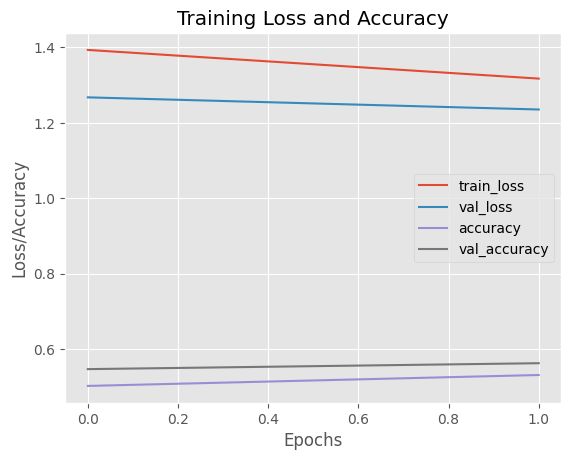

<Figure size 640x480 with 0 Axes>

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure("Window Training Loss and Accuracy")
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["accuracy"], label="accuracy")
plt.plot(H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

plt.savefig(r"data\CIFAR10\plot_CIFAR10.png")